# 고객 취향 군집화 실습

## **1. 환경 설정**

### 1.1 분서에 필요한 library 호출 및 google drive 연결

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans

## **2. 데이터 불러오기**

### 2.1 데이터 불러오기 및 확인

In [2]:
df_org = pd.read_csv('2019-Oct_purchase.csv')
df_org.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553


In [3]:
df_org.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
742844,2019-10-31 23:55:13 UTC,purchase,26402784,2053013563651392361,NaN,NaN,102.45,516604399,a98bd433-57ac-42d0-ba81-e18b135a7a16
742845,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
742846,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
742847,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b
742848,2019-10-31 23:59:16 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998


In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742849 entries, 0 to 742848
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     742849 non-null  object 
 1   event_type     742849 non-null  object 
 2   product_id     742849 non-null  int64  
 3   category_id    742849 non-null  int64  
 4   category_code  569424 non-null  object 
 5   brand          684544 non-null  object 
 6   price          742849 non-null  float64
 7   user_id        742849 non-null  int64  
 8   user_session   742849 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 51.0+ MB


### 2.2 필요한 분석에 데이터 확인 및 선택

In [5]:
# event_type 별 값 확인 
df_org['event_type'].value_counts()

purchase    742849
Name: event_type, dtype: int64

In [6]:
# 데이터 용량이 너무커서 필요한 구매 데이터만 사용하기로함
df_org = df_org[df_org.event_type =="purchase"]

In [7]:
df_org = pd.read_csv('2019-Oct_purchase.csv')

## **3. NULL 값 처리**

### 3.1 NULL 값 확인

In [8]:
# Null 값이 있는 전체 case 수 확인
print(df_org.isnull().sum().sum())

231730


In [9]:
# Null 값의 비율
df_org.isnull().sum().sum() / df_org.shape[0]

0.3119476501953964

In [10]:
# Null 값이 있는 변수 확인 (null 값이 있는 컬럼이 2개 존재)

df_org.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    173425
brand             58305
price                 0
user_id               0
user_session          0
dtype: int64

In [11]:
# 둘다 null 값인 항목확인 (38,388 건)
df_org[(df_org.category_code.isnull()) & (df_org.brand.isnull())]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
13,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
17,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
21,2019-10-01 02:21:45 UTC,purchase,28100000,2053013564918072245,NaN,NaN,60.49,517953667,7954f58c-158d-402d-9820-c502a5eea86d
43,2019-10-01 02:26:02 UTC,purchase,34800175,2062461754293617058,NaN,NaN,33.46,512594464,f18609cf-7cab-47cf-aaf8-8622202722bd
67,2019-10-01 02:30:49 UTC,purchase,26012158,2053013562837697343,NaN,NaN,14.16,518446593,c0c4d86a-bf3c-4453-acfc-e69bd981d605
...,...,...,...,...,...,...,...,...,...
742827,2019-10-31 23:45:46 UTC,purchase,26500442,2053013563550729061,NaN,NaN,115.58,513911691,e6e67023-2258-4341-bd66-a9500d7da596
742840,2019-10-31 23:51:02 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742841,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742843,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In [12]:
# brand 값이 null 값인 건 확인 
df_org[df_org.brand.isnull()]
# 활용 가능할까? 어떤 제품을 구매했는지 모르더라도 카테고리 정보만 알수  있다면 활용할 수 있을것으로 판단됨. 단, 이번 실습에서는 제외 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
13,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
17,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
21,2019-10-01 02:21:45 UTC,purchase,28100000,2053013564918072245,NaN,NaN,60.49,517953667,7954f58c-158d-402d-9820-c502a5eea86d
29,2019-10-01 02:23:03 UTC,purchase,19100075,2053013556227473861,construction.tools.saw,NaN,120.47,513484630,92bc0a54-4dab-4748-9a39-edbb4c760254
43,2019-10-01 02:26:02 UTC,purchase,34800175,2062461754293617058,NaN,NaN,33.46,512594464,f18609cf-7cab-47cf-aaf8-8622202722bd
...,...,...,...,...,...,...,...,...,...
742827,2019-10-31 23:45:46 UTC,purchase,26500442,2053013563550729061,NaN,NaN,115.58,513911691,e6e67023-2258-4341-bd66-a9500d7da596
742840,2019-10-31 23:51:02 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742841,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
742843,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f



### 3.2 NULL 값 처리 (삭제) 및 확인

In [13]:
# 이후 브랜드명과 category 값을 기준으로 군집을 생성하고 확인하려고 함. 그렇기 때문에 두 값중 하나라도 null 값인 것은 삭제 

In [14]:
df_na_treat =  df_org.dropna(axis = 0)

In [15]:
df_na_treat.isnull().sum().sum()

0

## **4. 데이터탐색 및 이상치 제거**

### 4.1 전체 데이터 확인 

In [16]:
# 전체 데이터 확인 
df_na_treat.shape

(549507, 9)

In [17]:
# 연속형 변수의 분포 확인 
df_na_treat.describe()
# price를 제외한 나머지는 의미가 없음 

,product_id,category_id,price,user_id
count,5.495070e+05,5.495070e+05,549507.000000,5.495070e+05
mean,3.054594e+06,2.054518e+18,371.001168,5.363179e+08
std,5.111423e+06,1.258658e+16,370.971646,1.832481e+07
min,1.000978e+06,2.053014e+18,0.880000,3.031604e+08
25%,1.004767e+06,2.053014e+18,131.530000,5.171431e+08
50%,1.005100e+06,2.053014e+18,230.880000,5.365788e+08
75%,3.600937e+06,2.053014e+18,462.440000,5.545513e+08
max,6.050000e+07,2.173217e+18,2574.040000,5.662783e+08


In [18]:
# 변수 type 확인
df_na_treat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549507 entries, 0 to 742848
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     549507 non-null  object 
 1   event_type     549507 non-null  object 
 2   product_id     549507 non-null  int64  
 3   category_id    549507 non-null  int64  
 4   category_code  549507 non-null  object 
 5   brand          549507 non-null  object 
 6   price          549507 non-null  float64
 7   user_id        549507 non-null  int64  
 8   user_session   549507 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 41.9+ MB


### 4.2 카테고리 데이터 데이터 확인 및 파생

In [19]:
# 카테고리 정보확인
df_na_treat.category_code.value_counts(normalize =True)
# 카테고리 텍스트로 들어오고 있으나 값이 "."을 기준으로 구분되어있음

electronics.smartphone         0.614323
electronics.audio.headphone    0.055393
electronics.video.tv           0.039213
electronics.clocks             0.030294
appliances.kitchen.washer      0.029224
                                 ...   
apparel.skirt                  0.000005
apparel.jeans                  0.000005
apparel.shorts                 0.000004
apparel.jumper                 0.000004
apparel.jacket                 0.000002
Name: category_code, Length: 120, dtype: float64

In [20]:
# 카테고리 파싱 (카테고리 단위별로 변수화)
df_na_treat[['ctgr_lv1','ctgr_lv2','ctgr_lv3','ctgr_lv4']] = df_na_treat['category_code'].str.split('.',expand= True)
df_na_treat

/Users/jongwoom1pro/opt/anaconda3/envs/dan1/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,ctgr_lv1,ctgr_lv2,ctgr_lv3,ctgr_lv4
0,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone,None,None
1,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone,None,None
3,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom,toilet,None
4,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio,headphone,None
5,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio,headphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742842,2019-10-31 23:53:53 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone,None,None
742845,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,tools,light,None
742846,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone,None,None
742847,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone,None,None


In [21]:
# 대카테고리 값과 비율 확인
pd.concat([df_na_treat['ctgr_lv1'].value_counts(),df_na_treat['ctgr_lv1'].value_counts(normalize =True) ], axis = 1)

# 전자제품과 생활가전이 전체 약 90% 를 차지함

,ctgr_lv1,ctgr_lv1
electronics,420361,0.764978
appliances,71231,0.129627
computers,27151,0.049410
auto,7869,0.014320
apparel,6152,0.011195
construction,5439,0.009898
kids,4529,0.008242
furniture,3828,0.006966
accessories,1432,0.002606
sport,1029,0.001873


In [22]:
# 대카테고리 'electronics' 값 확인 
pd.concat([df_na_treat.loc[df_na_treat.ctgr_lv1 =="electronics",['ctgr_lv2']].value_counts(),
          df_na_treat.loc[df_na_treat.ctgr_lv1 =="electronics",['ctgr_lv2']].value_counts(normalize=True)], axis= 1)

# 스마트 폰은 비율이 너무 크기 때문에 브랜드로 나눠서 분석이 가능할 것으로 판단됨.
# 스마트 폰을 제외한 나머지를 하나의 카테고리로 묶어서 보기로 함.

,0,1
ctgr_lv2,,
smartphone,337575,0.803060
audio,34653,0.082436
video,21630,0.051456
clocks,16647,0.039602
tablet,5599,0.013320
telephone,3733,0.008880
camera,524,0.001247


In [23]:
# 대카테고리 'electronics.smartphone' 값 확인 
pd.concat([df_na_treat.loc[(df_na_treat.ctgr_lv1 =="electronics")&(df_na_treat.ctgr_lv2 =="smartphone") ,['brand']].value_counts(), 
df_na_treat.loc[(df_na_treat.ctgr_lv1 =="electronics")&(df_na_treat.ctgr_lv2 =="smartphone") ,['brand']].value_counts(normalize=True)], axis = 1)

# 전자제품의 스마트폰  카테고리는 비율이 크기 때문에 brand 단위로 봐도 일정 비율이 나올것 같음.
# 스마트폰 브랜드를 본결과 삼성,애플, 기타 안드로이드폰으로 분류 

,0,1
brand,,
samsung,143123,0.423974
apple,115345,0.341687
xiaomi,38776,0.114866
huawei,21882,0.064821
oppo,10891,0.032262
vivo,2025,0.005999
meizu,1686,0.004994
honor,555,0.001644
nokia,512,0.001517


In [24]:
# 대카테고리 'appliances' 값 확인 
pd.concat([df_na_treat.loc[df_na_treat.ctgr_lv1 =="appliances",['ctgr_lv2']].value_counts(),
          df_na_treat.loc[df_na_treat.ctgr_lv1 =="appliances",['ctgr_lv2']].value_counts(normalize=True)], axis= 1)
# appliances 는 중카테고리의 수가 작아 appliances 단일로 분석하는것이 좋을것으로 판단됨

,0,1
ctgr_lv2,,
kitchen,45057,0.632548
environment,17437,0.244795
iron,3647,0.051200
personal,2493,0.034999
sewing_machine,1939,0.027221
ironing_board,658,0.009238


### 4.3 트랜잭션 단위 데이터 -> 유저단위 데이터로  변경 (각 row 별 다른 유저 정보로 )

In [25]:
# 유저별 구매 카운트 확인, 전략 카테고리 생성 
user_by_ctgr_cnt = df_na_treat.groupby('user_id').agg(
    pur_cnt = ('event_time', 'count')
#   , cash_sum = ('price', 'sum')
)

In [26]:
# 유저별 전략 카테고리 값 요약  
smartphone_samsung =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & (df_na_treat.brand == 'samsung')].groupby('user_id')['brand'].count()
smartphone_apple =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & (df_na_treat.brand == 'apple')].groupby('user_id')['brand'].count()
smartphone_ect =  df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & (df_na_treat.ctgr_lv2 == 'smartphone') & ~(df_na_treat.brand == 'samsung') & ~(df_na_treat.brand == 'apple')].groupby('user_id')['brand'].count()
electronics = df_na_treat[(df_na_treat.ctgr_lv1 == 'electronics') & ~(df_na_treat.ctgr_lv2 == 'smartphone')].groupby('user_id')['brand'].count()
appliances = df_na_treat[(df_na_treat.ctgr_lv1 == 'appliances')].groupby('user_id')['brand'].count()
ect = df_na_treat[~((df_na_treat.ctgr_lv1 == 'electronics') | (df_na_treat.ctgr_lv1 == 'appliances'))].groupby('user_id')['brand'].count()

In [27]:
smartphone_apple.head()

user_id
403013066    1
410333972    1
444316141    1
451868425    1
453908841    1
Name: brand, dtype: int64

In [28]:
# series 를 data frame 변경 및 카테고리 명 변경 

smartphone_samsung = smartphone_samsung.to_frame().reset_index().rename(columns = {'brand':'smartphone_samsung'})
smartphone_apple = smartphone_apple.to_frame().reset_index().rename(columns = {'brand': 'smartphone_apple'})
smartphone_ect = smartphone_ect.to_frame().reset_index().rename(columns = {'brand' : 'smartphone_ect'})
electronics = electronics.to_frame().reset_index().rename(columns = {'brand': 'electronics'})
appliances = appliances.to_frame().reset_index().rename(columns ={'brand' : 'appliances'})
ect = ect.to_frame().reset_index().rename(columns = {'brand' :'etc'})


In [29]:
smartphone_samsung.head()

,user_id,smartphone_samsung
0,403013066,1
1,415873351,2
2,424869855,1
3,427391662,1
4,430524990,1


In [30]:
# 데이터 통합 
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_samsung, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_apple, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,smartphone_ect, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,electronics, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,appliances, how ='left', on = 'user_id' )
user_by_ctgr_cnt = pd.merge(user_by_ctgr_cnt,ect, how ='left', on = 'user_id' )
user_by_ctgr_cnt.fillna(0,inplace= True)
user_by_ctgr_cnt.head()

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
0,303160429,1,0.0,0.0,0.0,1.0,0.0,0.0
1,340041246,1,0.0,0.0,0.0,1.0,0.0,0.0
2,384989212,1,0.0,0.0,0.0,0.0,1.0,0.0
3,401021311,1,0.0,0.0,0.0,1.0,0.0,0.0
4,403013066,2,1.0,1.0,0.0,0.0,0.0,0.0


### 4.4 이상치 확인 

In [31]:
# 연속형 변수 분포 확인 
user_by_ctgr_cnt.describe()

# max 값에 극단값이 있는것이 보임

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
count,2.634450e+05,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000,263445.000000
mean,5.366641e+08,2.085851,0.543275,0.437833,0.300279,0.314244,0.270383,0.219837
std,1.855121e+07,3.618213,1.889915,1.894715,1.178621,1.298420,0.914654,0.914932
min,3.031604e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.175192e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.365856e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.555559e+08,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.662783e+08,322.000000,192.000000,183.000000,154.000000,272.000000,71.000000,65.000000


In [32]:
# 이상치 케이스 확인
user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 100]

,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
893,512386086,322,105.0,67.0,1.0,87.0,61.0,1.0
3896,512511358,110,0.0,106.0,0.0,0.0,2.0,2.0
15991,513117637,183,0.0,183.0,0.0,0.0,0.0,0.0
19608,513320236,242,135.0,36.0,0.0,68.0,3.0,0.0
19654,513322839,146,101.0,0.0,4.0,6.0,13.0,22.0
26706,513784794,126,0.0,4.0,0.0,118.0,0.0,4.0
46995,515384420,122,0.0,122.0,0.0,0.0,0.0,0.0
55778,516214275,113,101.0,0.0,12.0,0.0,0.0,0.0
67388,517728689,178,171.0,0.0,7.0,0.0,0.0,0.0
76875,518957516,110,0.0,1.0,0.0,78.0,31.0,0.0


Text(0.5, 0, 'pur_cnt')

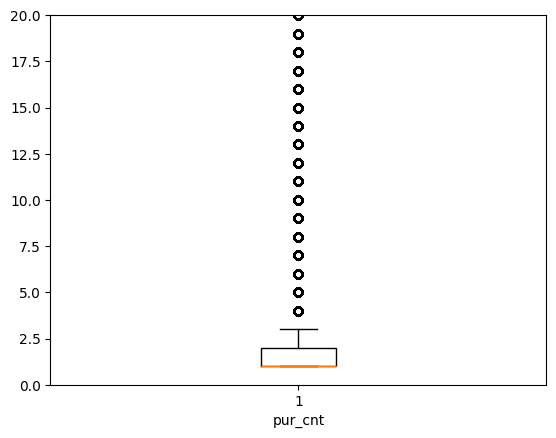

In [33]:
# box plot 으로 시각화 
fig, ax = plt.subplots()
ax.boxplot(user_by_ctgr_cnt['pur_cnt'])
ax.set_ylim (0,20)
ax.set_xlabel('pur_cnt')

### 4.5 이상치 기준 정의 

In [34]:
# 이상치 판단 기준 

user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 50]['user_id'].count()

print("표준편차 :", user_by_ctgr_cnt['pur_cnt'].std())
print("99분위수 :", user_by_ctgr_cnt['pur_cnt'].quantile(q =0.99), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 14]['user_id'].count())
print("3시그마 :", (user_by_ctgr_cnt['pur_cnt'].mean()) + (user_by_ctgr_cnt['pur_cnt'].std()*3), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 13]['user_id'].count())
print("6시그마 :", (user_by_ctgr_cnt['pur_cnt'].mean()) + (user_by_ctgr_cnt['pur_cnt'].std()*6), ", 대상자수 : ",user_by_ctgr_cnt[user_by_ctgr_cnt['pur_cnt']>= 23]['user_id'].count())
# 99분위수 확인  14  (14개 이상은 주문은 이상치로 간주하기로함)

표준편차 : 3.618212644021231
99분위수 : 14.0 , 대상자수 :  3013
3시그마 : 12.940488868691833 , 대상자수 :  3478
6시그마 : 23.795126800755526 , 대상자수 :  1115


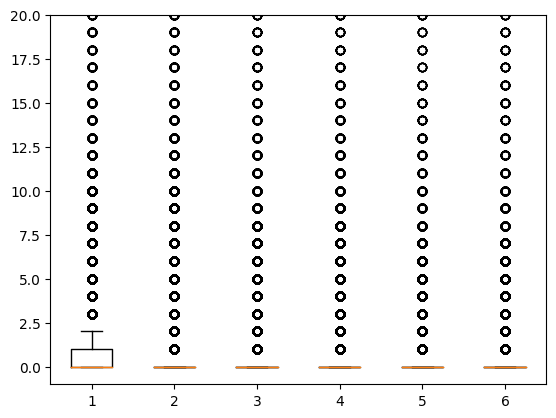

In [35]:
fig, ax = plt.subplots()
ax.boxplot([user_by_ctgr_cnt['smartphone_samsung'], user_by_ctgr_cnt['smartphone_apple'], user_by_ctgr_cnt['smartphone_ect'], user_by_ctgr_cnt['electronics'], user_by_ctgr_cnt['appliances'],user_by_ctgr_cnt['etc']])
ax.set_ylim (-1,20)
plt.show()

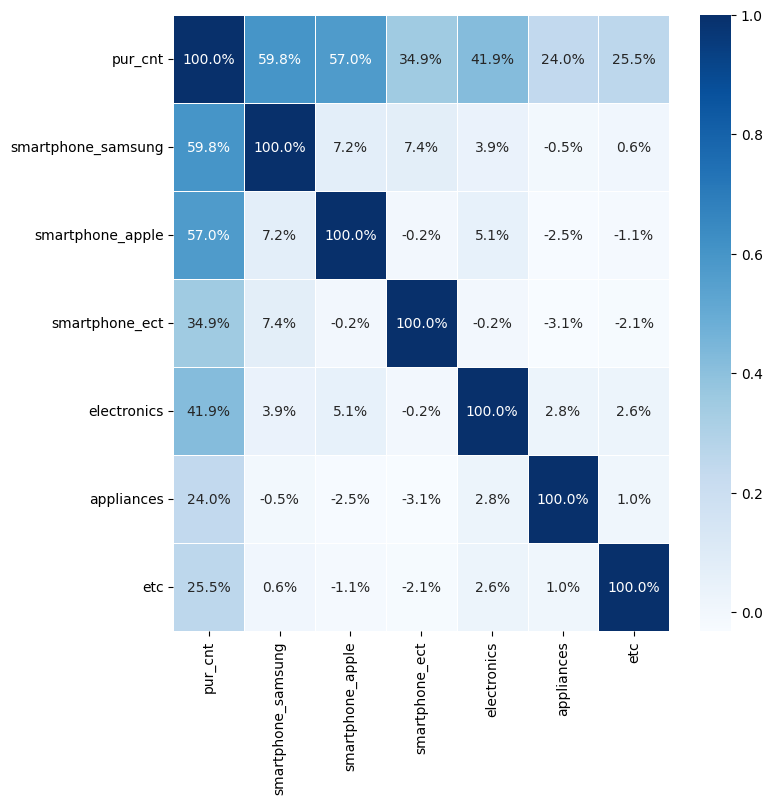

In [36]:
# 각 변수별 상관관계 확인 
plt.figure(figsize =(8,8))
sns.heatmap(data = user_by_ctgr_cnt[['pur_cnt','smartphone_samsung','smartphone_apple','smartphone_ect','electronics','appliances','etc']].corr(),annot= True,
            fmt ='.1%', linewidths =.5, cmap='Blues')
plt.show()

# 구매건수와 다른 변수간 연관성이 가장 큼. 그외는 거의 독립적임

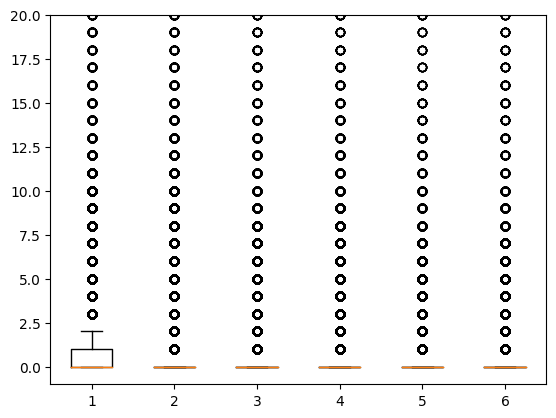

In [37]:
# 각 전략 카테고리별 구매건수 확인 
fig, ax = plt.subplots()
ax.boxplot([user_by_ctgr_cnt['smartphone_samsung'], user_by_ctgr_cnt['smartphone_apple'], user_by_ctgr_cnt['smartphone_ect'], user_by_ctgr_cnt['electronics'], user_by_ctgr_cnt['appliances'],user_by_ctgr_cnt['etc']])
ax.set_ylim (-1,20)
plt.show()

In [38]:
# 이상치 제거 
df_train_data = user_by_ctgr_cnt[(user_by_ctgr_cnt.pur_cnt < 14)]
print(df_train_data.shape)
df_train_data.describe()

(260432, 8)


,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc
count,2.604320e+05,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000,260432.000000
mean,5.366739e+08,1.817841,0.464601,0.356784,0.266023,0.277366,0.253828,0.199238
std,1.855710e+07,1.659568,1.022210,1.002537,0.768920,0.781203,0.697226,0.653681
min,3.031604e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.175314e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.365809e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.555716e+08,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.662783e+08,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000


## **5. 군집화**

### 5.1 변수의 표준화

In [39]:
df_train_data = df_train_data.reset_index()

In [40]:
# 변수 표준화 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train_data.iloc[:,2:])
np_train_scaled = scaler.transform(df_train_data.iloc[:,2:])
np_train_scaled

array([[-0.4928045 , -0.45450754, -0.35588177, ...,  0.92502851,
        -0.36405533, -0.30479472],
       [-0.4928045 , -0.45450754, -0.35588177, ...,  0.92502851,
        -0.36405533, -0.30479472],
       [-0.4928045 , -0.45450754, -0.35588177, ..., -0.35505048,
         1.07020317, -0.30479472],
       ...,
       [ 0.10976302,  0.52376719, -0.35588177, ..., -0.35505048,
         1.07020317, -0.30479472],
       [-0.4928045 , -0.45450754,  0.64158913, ..., -0.35505048,
        -0.36405533, -0.30479472],
       [-0.4928045 , -0.45450754,  0.64158913, ..., -0.35505048,
        -0.36405533, -0.30479472]])

### 5.2 군집화 알고리즘 적용 (k-means clustering)

In [41]:
# 최적의 cluster 개수 찾기

kmeans_per_k = [KMeans(n_clusters=k).fit(np_train_scaled) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

: 

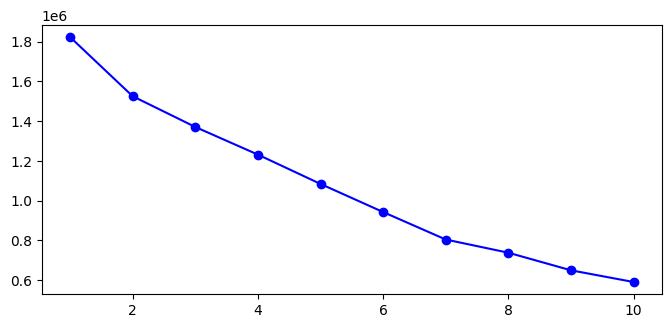

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
#plt.axis([1, 8.5, 0, 1300])
plt.show()

In [ ]:
# silhouette_score (가능하면 pass, 오래걸림)

# from sklearn.metrics import silhouette_score
# silhouette_score(np_train_scaled, kmeans.labels_)

### 5.3 8개 군집생성 및 군집별 특성확인

In [ ]:
# 8개 군집
kmeans = KMeans(n_clusters=8, random_state = 1111)
y_pred = kmeans.fit_predict(np_train_scaled)
kmeans.cluster_centers_
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
pd.DataFrame(y_pred)
#pd.concat(df_train_data, pd.DataFrame(y_pred))
df_train_data['clst_k8'] = pd.Series(y_pred)
df_train_data.head()


,index,user_id,pur_cnt,smartphone_samsung,smartphone_apple,smartphone_ect,electronics,appliances,etc,clst_k8
0,0,303160429,1,0.0,0.0,0.0,1.0,0.0,0.0,2
1,1,340041246,1,0.0,0.0,0.0,1.0,0.0,0.0,2
2,2,384989212,1,0.0,0.0,0.0,0.0,1.0,0.0,0
3,3,401021311,1,0.0,0.0,0.0,1.0,0.0,0.0,2
4,4,403013066,2,1.0,1.0,0.0,0.0,0.0,0.0,2


In [ ]:
# 각 군집별 비율 확인하기
round(df_train_data.groupby('clst_k8').user_id.count()/df_train_data.shape[0],3)

clst_k8
0    0.160
1    0.032
2    0.602
3    0.123
4    0.019
5    0.008
6    0.019
7    0.036
Name: user_id, dtype: float64

In [ ]:
# 8개 클러스터 EDA
df_train_data.groupby('clst_k8').agg(
    uu = ('user_id','count'),
    avg_pur_cnt = ('pur_cnt','mean'),
    smartphone_samsung_avg = ('smartphone_samsung','mean'),
    smartphone_apple_avg = ('smartphone_apple','mean'),
    smartphone_ect_avg = ('smartphone_ect','mean'),
    electronics_avg = ('electronics','mean'),
    appliances_avg = ('appliances','mean'),
    etc_avg = ('etc','mean')
)
# + 군집비율 붙이기 

,uu,avg_pur_cnt,smartphone_samsung_avg,smartphone_apple_avg,smartphone_ect_avg,electronics_avg,appliances_avg,etc_avg
clst_k8,,,,,,,,
0,41692,1.443898,0.056270,0.029814,0.034083,0.052816,1.244627,0.026288
1,8359,5.271085,0.252183,4.646608,0.075129,0.162460,0.059337,0.075368
2,156821,1.277150,0.440802,0.297479,0.269594,0.269275,0.000000,0.000000
3,32111,1.745757,0.069540,0.049578,0.040453,0.080845,0.028931,1.476410
4,4876,5.222518,0.220468,0.253486,0.087777,4.361977,0.118950,0.179861
5,2189,6.119689,0.315669,0.155779,0.132024,0.262220,5.007766,0.246231
6,4902,5.172787,0.399837,0.149939,4.298450,0.150959,0.076091,0.097511
7,9482,5.125923,4.372179,0.240350,0.196899,0.133727,0.092175,0.090593


- 0 군집 - 생활가전을 소량 구매 유저(16.0%)
- 1 군집 - 애플폰 다회(충성) 구매 유저 (3.2%)
- 2 군집 - 전자제품 (핸드폰 및 소형 가전제품) 단건 구매 유저(60.2%) 
- 3 군집 - 기타 상품 소회 구매 유저 (12.3%)
- 4 군집 - 스마트폰을 제외한 소형 가전제품 다회 구매 유저 (1.9%)
- 5 군집 - 생활가전 다회 구매하며 삼성폰을 간간히 구매 유저 (0.8%)
- 6 군집 - 기타 스마트폰 다회 구매 유저 (1.9%)
- 7 군집 - 삼성폰을 다회(충성) 구매 유저 (3.6%)

### 5.4 4개 군집생성 및 군집별 특성확인

In [ ]:
# 4개 군집
kmeans = KMeans(n_clusters=4, random_state= 1111)
y_pred = kmeans.fit_predict(np_train_scaled)
kmeans.cluster_centers_
y_pred
df_train_data['clst_k4'] = pd.Series(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 각 군집별 비율 확인하기
df_train_data.groupby('clst_k4').user_id.count()/df_train_data.shape[0]

clst_k4
0    0.166193
1    0.058603
2    0.128087
3    0.647117
Name: user_id, dtype: float64

In [ ]:
# 8개 클러스터 EDA
df_train_data.groupby('clst_k4').agg(
    uu = ('user_id','count'),
    avg_pur_cnt = ('pur_cnt','mean'),
    smartphone_samsung_avg = ('smartphone_samsung','mean'),
    smartphone_apple_avg = ('smartphone_apple','mean'),
    smartphone_ect_avg = ('smartphone_ect','mean'),
    electronics_avg = ('electronics','mean'),
    appliances_avg = ('appliances','mean'),
    etc_avg = ('etc','mean')
)

,uu,avg_pur_cnt,smartphone_samsung_avg,smartphone_apple_avg,smartphone_ect_avg,electronics_avg,appliances_avg,etc_avg
clst_k4,,,,,,,,
0,43282,1.663024,0.071877,0.038076,0.041079,0.067326,1.429624,0.015041
1,15262,6.736077,2.005111,2.357817,1.016446,1.061263,0.154698,0.140742
2,33358,1.799868,0.077912,0.053660,0.045446,0.095299,0.055969,1.471581
3,168530,1.415766,0.502492,0.317421,0.299496,0.296357,0.000000,0.000000


- 0 군집 - 생활 가전 단건 구매 유저 (16.6%)
- 1 군집 - 스마트폰 다회 구매 유저 (애플과 삼성 스마트폰 중심) 5.9%
- 2 군집 - 전자제품이 아닌 기타 제품 단건 구매 유저 (12.8%)
- 3 군집 - 휴대폰 및 소형가전만 단건 구매 유저 (64.6%)





---



### 5.5 5개 군집생성 및 군집별 특성확인

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe is loaded as df_train_data and clusters are already assigned to 'clst_k8'

# Display the first few rows of the dataframe
print(df_train_data.head())

# Check the distribution of each cluster
cluster_distribution = df_train_data['clst_k8'].value_counts(normalize=True)
print(cluster_distribution)

# Aggregate data to understand the characteristics of each cluster
cluster_summary = df_train_data.groupby('clst_k8').agg(
    uu=('user_id', 'count'),
    avg_pur_cnt=('pur_cnt', 'mean'),
    smartphone_samsung_avg=('smartphone_samsung', 'mean'),
    smartphone_apple_avg=('smartphone_apple', 'mean'),
    smartphone_ect_avg=('smartphone_ect', 'mean'),
    electronics_avg=('electronics', 'mean'),
    appliances_avg=('appliances', 'mean'),
    etc_avg=('etc', 'mean')
).reset_index()

print(cluster_summary)

# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['clst_k8'], y=cluster_summary['uu'])
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Users Across Clusters')
plt.show()

# Plot the average purchase count per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary['clst_k8'], y=cluster_summary['avg_pur_cnt'])
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Count')
plt.title('Average Purchase Count per Cluster')
plt.show()

# Plot the average usage of different product categories per cluster
categories = ['smartphone_samsung_avg', 'smartphone_apple_avg', 'smartphone_ect_avg', 'electronics_avg', 'appliances_avg', 'etc_avg']
cluster_summary_melted = cluster_summary.melt(id_vars='clst_k8', value_vars=categories, var_name='Category', value_name='Average Usage')

plt.figure(figsize=(14, 8))
sns.barplot(x='clst_k8', y='Average Usage', hue='Category', data=cluster_summary_melted)
plt.xlabel('Cluster')
plt.ylabel('Average Usage')
plt.title('Average Usage of Product Categories per Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


NameError: name 'df_train_data' is not defined